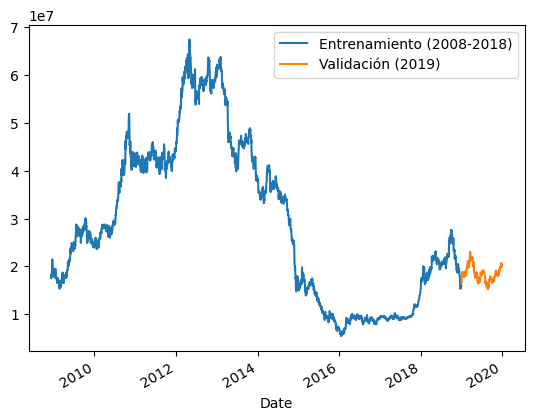

Epoch 1/20
78/78 [==============================] - 4s 21ms/step - loss: 0.0069
Epoch 2/20
78/78 [==============================] - 2s 21ms/step - loss: 0.0010
Epoch 3/20
78/78 [==============================] - 2s 22ms/step - loss: 8.4701e-04
Epoch 4/20
78/78 [==============================] - 2s 21ms/step - loss: 5.4139e-04
Epoch 5/20
78/78 [==============================] - 2s 21ms/step - loss: 5.5588e-04
Epoch 6/20
78/78 [==============================] - 2s 21ms/step - loss: 4.5716e-04
Epoch 7/20
78/78 [==============================] - 2s 21ms/step - loss: 4.0980e-04
Epoch 8/20
78/78 [==============================] - 2s 21ms/step - loss: 3.9480e-04
Epoch 9/20
78/78 [==============================] - 2s 21ms/step - loss: 3.5543e-04
Epoch 10/20
78/78 [==============================] - 2s 21ms/step - loss: 3.5370e-04
Epoch 11/20
78/78 [==============================] - 2s 21ms/step - loss: 2.9931e-04
Epoch 12/20
78/78 [==============================] - 2s 21ms/step - loss: 3.1423e-

c:\program files\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


6/6 [==============================] - 0s 9ms/step


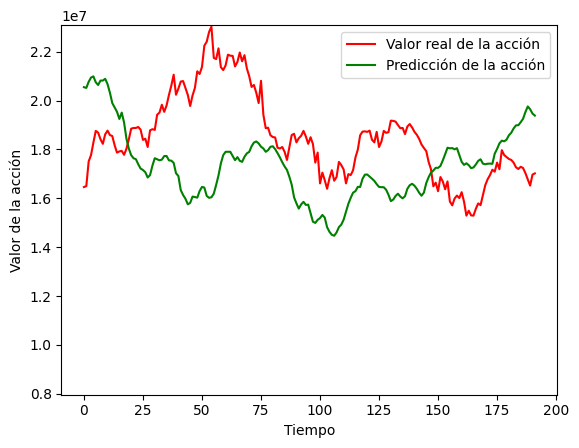

In [1]:
#Ecopetrol total de años.
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np
import matplotlib.pyplot as matpl
import pandas as pan
np.random.seed(5)



def show_predict(real, prediccion): # Función para la visualización de los datos.
    matpl.plot(real[0:len(prediccion)],color='red', label='Valor real de la acción')
    matpl.plot(prediccion, color='green', label='Predicción de la acción')
    matpl.ylim(1.1 * np.min(prediccion)/2, 1.1 * np.max(prediccion))
    matpl.xlabel('Tiempo')
    matpl.ylabel('Valor de la acción')
    matpl.legend()
    matpl.show()

ecopetrol_data = pan.read_csv('ecopetrolfinal.csv', index_col='Date', parse_dates=['Date'])# Lectura del csv
ecopetrol_data.head() #Muestra la tabla.

training_set = ecopetrol_data['2008':'2018'].iloc[:,3:4] #set de entrenamiento.
validation_set = ecopetrol_data['2019':'2019'].iloc[:,3:4]#set de validación.

training_set['Final'].plot(legend=True) #obtiene los valores de cierre de la acción para el set de entrenamiento.
validation_set['Final'].plot(legend=True)#obtiene los valores de cierre de la acción para el set de validación.
matpl.legend(['Entrenamiento (2008-2018)', 'Validación (2019)'])
matpl.show()


set_normal = MinMaxScaler(feature_range=(0,1)) #Se normaliza el set de entrenamiento.
training_set_scaled = set_normal.fit_transform(training_set) #transformación inversa para valores en la escala real.


data_amount = 60 #cantidad de datos consecutivos que entrenaran la red neuronal.
vector_x = [] #Aquí guardamos los 60 valores de entrenamiento
output_y = [] #Aquí guardaremos el valor de salida, el valor #61
m = len(training_set_scaled)

for i in range(data_amount,m):
    # X: bloques de datos; 0, 1, 2... etc.
    vector_x.append(training_set_scaled[i-data_amount:i,0])
    # Y: El dato 61
    output_y.append(training_set_scaled[i,0])
    
    
vector_x, output_y = np.array(vector_x), np.array(output_y)


vector_x = np.reshape(vector_x, (vector_x.shape[0], vector_x.shape[1], 1)) #Se re ajusta el tamaño, se transforma en un vector de 60x1


# Creación de la Red LSTM

input_dimension = (vector_x.shape[1],1) #Tamaño de entada 
output_dimenstion = 1
neuron = 50 #numero de neuronas

container_lstm = Sequential() #Crea el contenedor de la red LSTM
container_lstm.add(LSTM(units=neuron, input_shape=input_dimension)) #Se añade la cantidad de neuronas y el tamaño de entrada. 
container_lstm.add(Dense(units=output_dimenstion)) #Con dense especificamos el tamaño de salida, en este caso igual a 1
container_lstm.compile(optimizer='rmsprop', loss='mse') #Función de error cuadratico medio
container_lstm.fit(vector_x,output_y,epochs=20,batch_size=32) #utilizamos 32 ejemplos y 20 iteraciones.



# Se valida el valor de las accines.

vector_test = validation_set.values
vector_test = set_normal.transform(vector_test) #Normalizamos los datos recibidos para la validación.

test = []
for i in range(data_amount,len(vector_test)): #Se reorganiza el set en bloques de 60 datos
    test.append(vector_test[i-data_amount:i,0])
test = np.array(test)
test = np.reshape(test, (test.shape[0],test.shape[1],1))

prediction = container_lstm.predict(test) #realizamos la predcción 
prediction = set_normal.inverse_transform(prediction) #se aplica la normalización inversa.

# Graficar resultados
show_predict(validation_set.values,prediction)

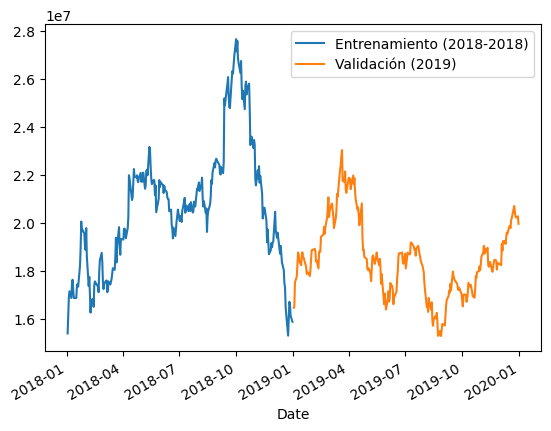

Epoch 1/20
6/6 [==============================] - 2s 28ms/step - loss: 0.1412
Epoch 2/20
6/6 [==============================] - 0s 23ms/step - loss: 0.0178
Epoch 3/20
6/6 [==============================] - 0s 26ms/step - loss: 0.0152
Epoch 4/20
6/6 [==============================] - 0s 23ms/step - loss: 0.0133
Epoch 5/20
6/6 [==============================] - 0s 25ms/step - loss: 0.0119
Epoch 6/20
6/6 [==============================] - 0s 24ms/step - loss: 0.0120
Epoch 7/20
6/6 [==============================] - 0s 23ms/step - loss: 0.0105
Epoch 8/20
6/6 [==============================] - 0s 24ms/step - loss: 0.0089
Epoch 9/20
6/6 [==============================] - 0s 24ms/step - loss: 0.0085
Epoch 10/20
6/6 [==============================] - 0s 27ms/step - loss: 0.0086
Epoch 11/20
6/6 [==============================] - 0s 23ms/step - loss: 0.0067
Epoch 12/20
6/6 [==============================] - 0s 24ms/step - loss: 0.0059
Epoch 13/20
6/6 [==============================] - 0s 24ms/st

c:\program files\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


6/6 [==============================] - 0s 11ms/step


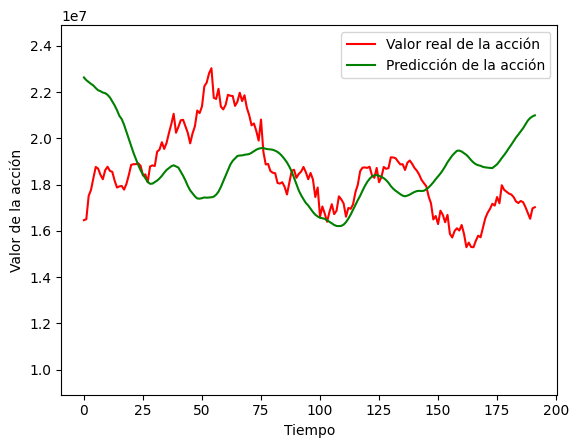

In [3]:
#Ecopetrol 1 año
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np
import matplotlib.pyplot as matpl
import pandas as pan
np.random.seed(5)



def show_predict(real, prediccion): # Función para la visualización de los datos.
    matpl.plot(real[0:len(prediccion)],color='red', label='Valor real de la acción')
    matpl.plot(prediccion, color='green', label='Predicción de la acción')
    matpl.ylim(1.1 * np.min(prediccion)/2, 1.1 * np.max(prediccion))
    matpl.xlabel('Tiempo')
    matpl.ylabel('Valor de la acción')
    matpl.legend()
    matpl.show()

ecopetrol_data = pan.read_csv('ecopetrolfinal.csv', index_col='Date', parse_dates=['Date'])# Lectura del csv
ecopetrol_data.head() #Muestra la tabla.

training_set = ecopetrol_data['2018':'2018'].iloc[:,3:4] #set de entrenamiento.
validation_set = ecopetrol_data['2019':'2019'].iloc[:,3:4]#set de validación.

training_set['Final'].plot(legend=True) #obtiene los valores de cierre de la acción para el set de entrenamiento.
validation_set['Final'].plot(legend=True)#obtiene los valores de cierre de la acción para el set de validación.
matpl.legend(['Entrenamiento (2018-2018)', 'Validación (2019)'])
matpl.show()


set_normal = MinMaxScaler(feature_range=(0,1)) #Se normaliza el set de entrenamiento.
training_set_scaled = set_normal.fit_transform(training_set) #transformación inversa para valores en la escala real.


data_amount = 60 #cantidad de datos consecutivos que entrenaran la red neuronal.
vector_x = [] #Aquí guardamos los 60 valores de entrenamiento
output_y = [] #Aquí guardaremos el valor de salida, el valor #61
m = len(training_set_scaled)

for i in range(data_amount,m):
    # X: bloques de datos; 0, 1, 2... etc.
    vector_x.append(training_set_scaled[i-data_amount:i,0])
    # Y: El dato 61
    output_y.append(training_set_scaled[i,0])
    
    
vector_x, output_y = np.array(vector_x), np.array(output_y)


vector_x = np.reshape(vector_x, (vector_x.shape[0], vector_x.shape[1], 1)) #Se re ajusta el tamaño, se transforma en un vector de 60x1


# Creación de la Red LSTM

input_dimension = (vector_x.shape[1],1) #Tamaño de entada 
output_dimenstion = 1
neuron = 50 #numero de neuronas

container_lstm = Sequential() #Crea el contenedor de la red LSTM
container_lstm.add(LSTM(units=neuron, input_shape=input_dimension)) #Se añade la cantidad de neuronas y el tamaño de entrada. 
container_lstm.add(Dense(units=output_dimenstion)) #Con dense especificamos el tamaño de salida, en este caso igual a 1
container_lstm.compile(optimizer='rmsprop', loss='mse') #Función de error cuadratico medio
container_lstm.fit(vector_x,output_y,epochs=20,batch_size=32) #utilizamos 32 ejemplos y 20 iteraciones.



# Se valida el valor de las accines.

vector_test = validation_set.values
vector_test = set_normal.transform(vector_test) #Normalizamos los datos recibidos para la validación.

test = []
for i in range(data_amount,len(vector_test)): #Se reorganiza el set en bloques de 60 datos
    test.append(vector_test[i-data_amount:i,0])
test = np.array(test)
test = np.reshape(test, (test.shape[0],test.shape[1],1))

prediction = container_lstm.predict(test) #realizamos la predcción 
prediction = set_normal.inverse_transform(prediction) #se aplica la normalización inversa.

# Graficar resultados
show_predict(validation_set.values,prediction)

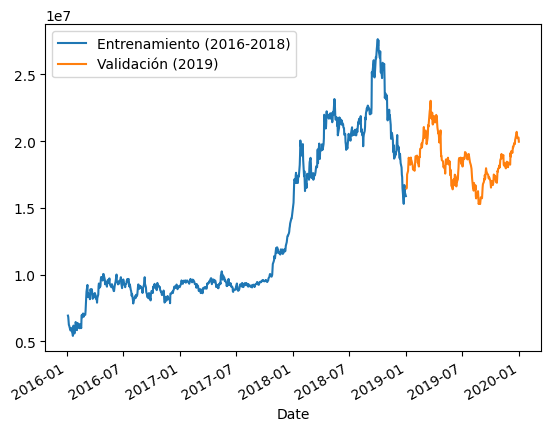

Epoch 1/20
22/22 [==============================] - 2s 24ms/step - loss: 0.0335
Epoch 2/20
22/22 [==============================] - 0s 22ms/step - loss: 0.0039
Epoch 3/20
22/22 [==============================] - 1s 27ms/step - loss: 0.0029
Epoch 4/20
22/22 [==============================] - 1s 38ms/step - loss: 0.0028
Epoch 5/20
22/22 [==============================] - 1s 25ms/step - loss: 0.0019
Epoch 6/20
22/22 [==============================] - 1s 29ms/step - loss: 0.0020
Epoch 7/20
22/22 [==============================] - 1s 27ms/step - loss: 0.0015
Epoch 8/20
22/22 [==============================] - 1s 29ms/step - loss: 0.0014
Epoch 9/20
22/22 [==============================] - 1s 26ms/step - loss: 0.0013
Epoch 10/20
22/22 [==============================] - 1s 24ms/step - loss: 0.0010
Epoch 11/20
22/22 [==============================] - 1s 26ms/step - loss: 0.0011
Epoch 12/20
22/22 [==============================] - 1s 26ms/step - loss: 0.0011
Epoch 13/20
22/22 [==================

c:\program files\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


6/6 [==============================] - 1s 9ms/step


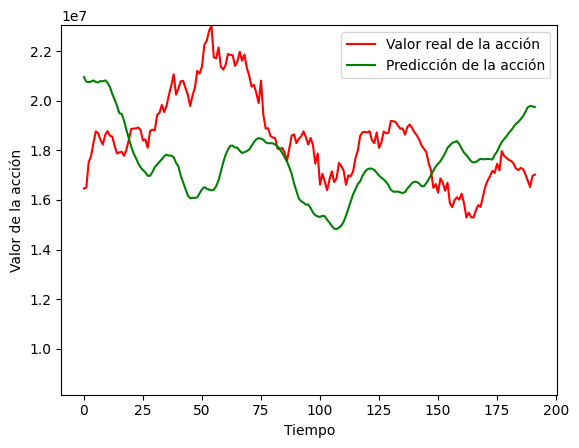

In [4]:
#Ecopetrol 3 año.
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np
import matplotlib.pyplot as matpl
import pandas as pan
np.random.seed(5)



def show_predict(real, prediccion): # Función para la visualización de los datos.
    matpl.plot(real[0:len(prediccion)],color='red', label='Valor real de la acción')
    matpl.plot(prediccion, color='green', label='Predicción de la acción')
    matpl.ylim(1.1 * np.min(prediccion)/2, 1.1 * np.max(prediccion))
    matpl.xlabel('Tiempo')
    matpl.ylabel('Valor de la acción')
    matpl.legend()
    matpl.show()

ecopetrol_data = pan.read_csv('ecopetrolfinal.csv', index_col='Date', parse_dates=['Date'])# Lectura del csv
ecopetrol_data.head() #Muestra la tabla.

training_set = ecopetrol_data['2016':'2018'].iloc[:,3:4] #set de entrenamiento.
validation_set = ecopetrol_data['2019':'2019'].iloc[:,3:4]#set de validación.

training_set['Final'].plot(legend=True) #obtiene los valores de cierre de la acción para el set de entrenamiento.
validation_set['Final'].plot(legend=True)#obtiene los valores de cierre de la acción para el set de validación.
matpl.legend(['Entrenamiento (2016-2018)', 'Validación (2019)'])
matpl.show()


set_normal = MinMaxScaler(feature_range=(0,1)) #Se normaliza el set de entrenamiento.
training_set_scaled = set_normal.fit_transform(training_set) #transformación inversa para valores en la escala real.


data_amount = 60 #cantidad de datos consecutivos que entrenaran la red neuronal.
vector_x = [] #Aquí guardamos los 60 valores de entrenamiento
output_y = [] #Aquí guardaremos el valor de salida, el valor #61
m = len(training_set_scaled)

for i in range(data_amount,m):
    # X: bloques de datos; 0, 1, 2... etc.
    vector_x.append(training_set_scaled[i-data_amount:i,0])
    # Y: El dato 61
    output_y.append(training_set_scaled[i,0])
    
    
vector_x, output_y = np.array(vector_x), np.array(output_y)


vector_x = np.reshape(vector_x, (vector_x.shape[0], vector_x.shape[1], 1)) #Se re ajusta el tamaño, se transforma en un vector de 60x1


# Creación de la Red LSTM

input_dimension = (vector_x.shape[1],1) #Tamaño de entada 
output_dimenstion = 1
neuron = 50 #numero de neuronas

container_lstm = Sequential() #Crea el contenedor de la red LSTM
container_lstm.add(LSTM(units=neuron, input_shape=input_dimension)) #Se añade la cantidad de neuronas y el tamaño de entrada. 
container_lstm.add(Dense(units=output_dimenstion)) #Con dense especificamos el tamaño de salida, en este caso igual a 1
container_lstm.compile(optimizer='rmsprop', loss='mse') #Función de error cuadratico medio
container_lstm.fit(vector_x,output_y,epochs=20,batch_size=32) #utilizamos 32 ejemplos y 20 iteraciones.



# Se valida el valor de las accines.

vector_test = validation_set.values
vector_test = set_normal.transform(vector_test) #Normalizamos los datos recibidos para la validación.

test = []
for i in range(data_amount,len(vector_test)): #Se reorganiza el set en bloques de 60 datos
    test.append(vector_test[i-data_amount:i,0])
test = np.array(test)
test = np.reshape(test, (test.shape[0],test.shape[1],1))

prediction = container_lstm.predict(test) #realizamos la predcción 
prediction = set_normal.inverse_transform(prediction) #se aplica la normalización inversa.

# Graficar resultados
show_predict(validation_set.values,prediction)

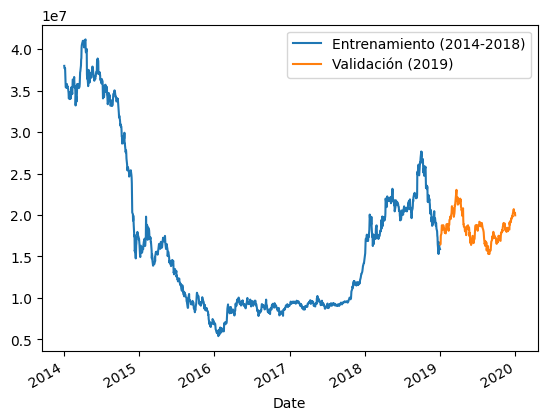

Epoch 1/20
38/38 [==============================] - 4s 33ms/step - loss: 0.0152
Epoch 2/20
38/38 [==============================] - 1s 31ms/step - loss: 0.0019
Epoch 3/20
38/38 [==============================] - 1s 37ms/step - loss: 0.0013
Epoch 4/20
38/38 [==============================] - 2s 60ms/step - loss: 0.0011
Epoch 5/20
38/38 [==============================] - 3s 77ms/step - loss: 7.6112e-04
Epoch 6/20
38/38 [==============================] - 2s 42ms/step - loss: 6.6012e-04
Epoch 7/20
38/38 [==============================] - 1s 33ms/step - loss: 6.6561e-04
Epoch 8/20
38/38 [==============================] - 1s 36ms/step - loss: 5.1815e-04
Epoch 9/20
38/38 [==============================] - 1s 29ms/step - loss: 5.4265e-04
Epoch 10/20
38/38 [==============================] - 1s 31ms/step - loss: 4.9843e-04
Epoch 11/20
38/38 [==============================] - 1s 31ms/step - loss: 4.8357e-04
Epoch 12/20
38/38 [==============================] - 1s 32ms/step - loss: 4.4269e-04
Epoch

c:\program files\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


6/6 [==============================] - 1s 12ms/step


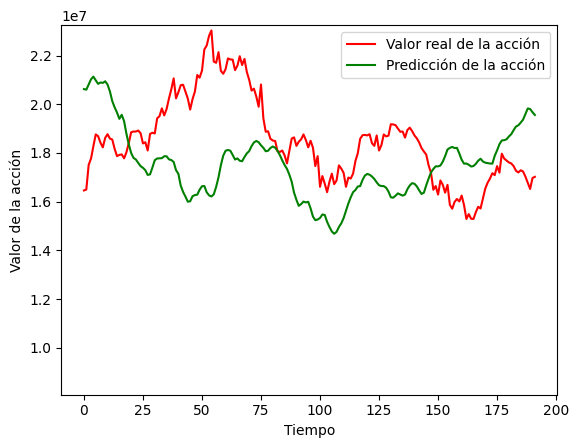

In [5]:
#Ecopetrol 5 años.
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np
import matplotlib.pyplot as matpl
import pandas as pan
np.random.seed(5)



def show_predict(real, prediccion): # Función para la visualización de los datos.
    matpl.plot(real[0:len(prediccion)],color='red', label='Valor real de la acción')
    matpl.plot(prediccion, color='green', label='Predicción de la acción')
    matpl.ylim(1.1 * np.min(prediccion)/2, 1.1 * np.max(prediccion))
    matpl.xlabel('Tiempo')
    matpl.ylabel('Valor de la acción')
    matpl.legend()
    matpl.show()

ecopetrol_data = pan.read_csv('ecopetrolfinal.csv', index_col='Date', parse_dates=['Date'])# Lectura del csv
ecopetrol_data.head() #Muestra la tabla.

training_set = ecopetrol_data['2014':'2018'].iloc[:,3:4] #set de entrenamiento.
validation_set = ecopetrol_data['2019':'2019'].iloc[:,3:4]#set de validación.

training_set['Final'].plot(legend=True) #obtiene los valores de cierre de la acción para el set de entrenamiento.
validation_set['Final'].plot(legend=True)#obtiene los valores de cierre de la acción para el set de validación.
matpl.legend(['Entrenamiento (2014-2018)', 'Validación (2019)'])
matpl.show()


set_normal = MinMaxScaler(feature_range=(0,1)) #Se normaliza el set de entrenamiento.
training_set_scaled = set_normal.fit_transform(training_set) #transformación inversa para valores en la escala real.


data_amount = 60 #cantidad de datos consecutivos que entrenaran la red neuronal.
vector_x = [] #Aquí guardamos los 60 valores de entrenamiento
output_y = [] #Aquí guardaremos el valor de salida, el valor #61
m = len(training_set_scaled)

for i in range(data_amount,m):
    # X: bloques de datos; 0, 1, 2... etc.
    vector_x.append(training_set_scaled[i-data_amount:i,0])
    # Y: El dato 61
    output_y.append(training_set_scaled[i,0])
    
    
vector_x, output_y = np.array(vector_x), np.array(output_y)


vector_x = np.reshape(vector_x, (vector_x.shape[0], vector_x.shape[1], 1)) #Se re ajusta el tamaño, se transforma en un vector de 60x1


# Creación de la Red LSTM

input_dimension = (vector_x.shape[1],1) #Tamaño de entada 
output_dimenstion = 1
neuron = 50 #numero de neuronas

container_lstm = Sequential() #Crea el contenedor de la red LSTM
container_lstm.add(LSTM(units=neuron, input_shape=input_dimension)) #Se añade la cantidad de neuronas y el tamaño de entrada. 
container_lstm.add(Dense(units=output_dimenstion)) #Con dense especificamos el tamaño de salida, en este caso igual a 1
container_lstm.compile(optimizer='rmsprop', loss='mse') #Función de error cuadratico medio
container_lstm.fit(vector_x,output_y,epochs=20,batch_size=32) #utilizamos 32 ejemplos y 20 iteraciones.



# Se valida el valor de las accines.

vector_test = validation_set.values
vector_test = set_normal.transform(vector_test) #Normalizamos los datos recibidos para la validación.

test = []
for i in range(data_amount,len(vector_test)): #Se reorganiza el set en bloques de 60 datos
    test.append(vector_test[i-data_amount:i,0])
test = np.array(test)
test = np.reshape(test, (test.shape[0],test.shape[1],1))

prediction = container_lstm.predict(test) #realizamos la predcción 
prediction = set_normal.inverse_transform(prediction) #se aplica la normalización inversa.

# Graficar resultados
show_predict(validation_set.values,prediction)